## Energy potential-dependence wavelength shifts

In [33]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 12,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'legend.fontsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

In [34]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Visible range\Data\Values_VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\Values_NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.concat([VIS_data,NIR_data],axis=0).drop_duplicates('Observed wavelength',keep='first').reset_index(drop=True) #Dont take repeated values when concatenate

#List of Nave with the potentials values
raw_lambda = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\Characterization\Third signature\Nave list potential.xlsx")

#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown','darkred']

In [35]:
# Take the energy potential values from the nave list
#Convert the wavelength in A cause its in cm^-1 
raw_lambda['Wave A'] = round((10**8)/raw_lambda['Wave (cm)'],4)
raw_lambda = raw_lambda.sort_values('Wave A', ascending=True, na_position='first')
raw_lambda = raw_lambda[raw_lambda['Wave A'].between(4000,23000,inclusive='right')] #Separate the range for use
raw_lambda = raw_lambda[raw_lambda['Quality']=='A'].drop(['Wave (cm)'],axis=1).reset_index(drop=True)
raw_lambda

,Quality,Lower potential level,Higher potential level,Wave A
0,A,2.990,6.089,4001.5883
1,A,2.176,5.273,4002.7931
2,A,3.237,6.331,4005.9597
3,A,3.017,6.112,4006.1108
4,A,1.557,4.652,4006.3743
...,...,...,...,...
3280,A,5.099,5.642,22838.5953
3281,A,5.828,6.370,22852.1702
3282,A,5.839,6.380,22888.7529
3283,A,5.334,5.874,22962.2707


In [36]:
# Take the energy excitation values for the lines
Energy_data_ALL = pd.DataFrame([])
Lower_potential = []
Higher_potential = []

for i in range(len(ALL_data)):
    data = raw_lambda[raw_lambda['Wave A'] == ALL_data['Emitted wavelength'].iloc[i]]
    Lower_potential.append(raw_lambda['Lower potential level'].iloc[i])
    Higher_potential.append(raw_lambda['Higher potential level'].iloc[i])

Energy_data_ALL['Lower potential'] = Lower_potential
Energy_data_ALL['Higher potential'] = Higher_potential
Energy_data_ALL['Velocity'] = ALL_data['Velocity']
Energy_data_ALL['Wave A'] = ALL_data['Observed wavelength']
Energy_data_ALL['Line Depth'] =ALL_data['Line Depth']

Energy_data_ALL

,Lower potential,Higher potential,Velocity,Wave A,Line Depth
0,2.990,6.089,-367,4060.8637,0.680344
1,2.176,5.273,-213,4068.4255,0.790107
2,3.237,6.331,-324,4080.9941,0.785819
3,3.017,6.112,-185,4086.1634,0.779078
4,1.557,4.652,-384,4088.2510,0.711281
...,...,...,...,...,...
766,3.283,5.410,-499,17165.8042,0.248327
767,5.099,7.226,-549,17209.0074,0.273511
768,2.608,4.733,-539,17307.0500,0.299686
769,4.913,7.037,-598,17315.5846,0.071818


In [37]:
# Take the energy excitation values for the lines
Energy_data_SPA = pd.DataFrame([])
Lower_potential = []
Higher_potential = []

for i in range(len(SPA_data)):
    data = raw_lambda[raw_lambda['Wave A'] == SPA_data['Emitted wavelength'].iloc[i]]
    Lower_potential.append(raw_lambda['Lower potential level'].iloc[i])
    Higher_potential.append(raw_lambda['Higher potential level'].iloc[i])

Energy_data_SPA['Lower potential'] = Lower_potential
Energy_data_SPA['Higher potential'] = Higher_potential
Energy_data_SPA['Velocity'] = ALL_data['Velocity']
Energy_data_SPA['Wave A'] = ALL_data['Observed wavelength']
Energy_data_SPA['Line Depth'] =ALL_data['Line Depth']

Energy_data_SPA

,Lower potential,Higher potential,Velocity,Wave A,Line Depth
0,2.990,6.089,-367,4060.8637,0.680344
1,2.176,5.273,-213,4068.4255,0.790107
2,3.237,6.331,-324,4080.9941,0.785819
3,3.017,6.112,-185,4086.1634,0.779078
4,1.557,4.652,-384,4088.2510,0.711281
...,...,...,...,...,...
473,3.694,6.134,-400,7449.4507,0.233739
474,3.267,5.706,-408,7463.5811,0.207868
475,0.958,3.396,-461,7475.6164,0.123948
476,4.256,6.691,-557,7478.4367,0.126839


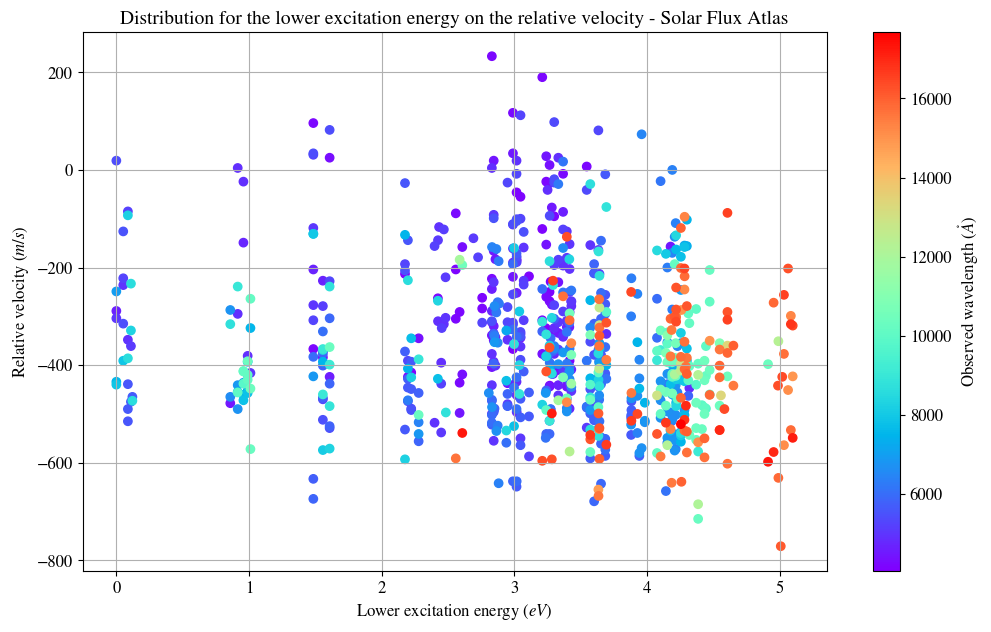

In [ ]:
fig1, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(Energy_data_ALL['Lower potential'],Energy_data_ALL['Velocity'],c=Energy_data_ALL['Wave A'],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Distribution for the lower excitation energy on the relative velocity - Solar Flux Atlas')
ax.set_xlabel(r'Lower excitation energy $(eV)$')
ax.set_ylabel(r'Relative velocity $(m/s)$')
ax.grid()

# fig1.savefig('Velocity lower potential_ALL')

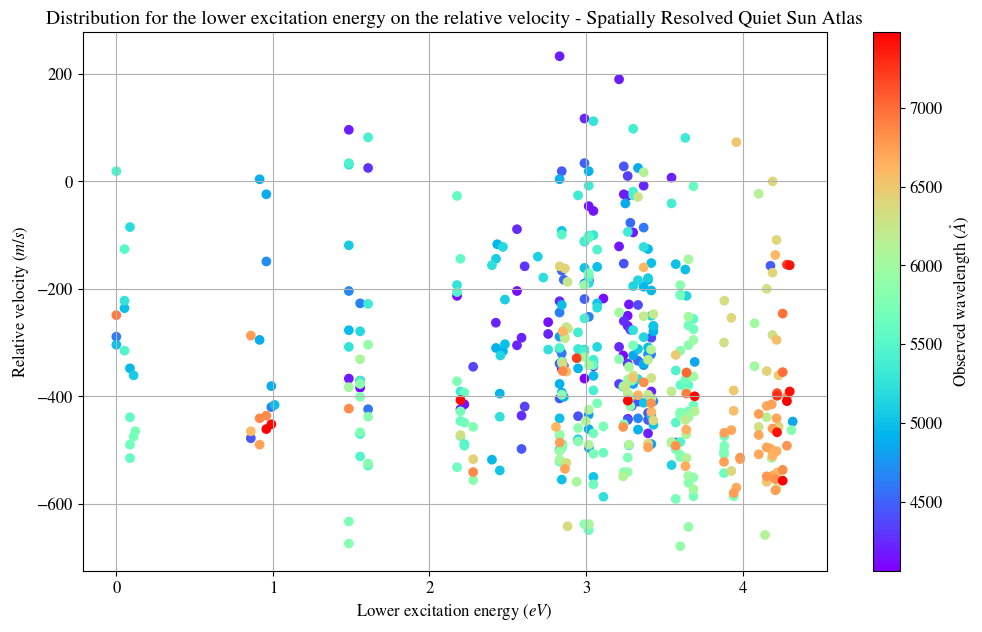

In [ ]:
fig2, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(Energy_data_SPA['Lower potential'],Energy_data_SPA['Velocity'],c=Energy_data_SPA['Wave A'],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Distribution for the lower excitation energy on the relative velocity - Spatially Resolved Quiet Sun Atlas')
ax.set_xlabel(r'Lower excitation energy $(eV)$')
ax.set_ylabel(r'Relative velocity $(m/s)$')
ax.grid()

# fig2.savefig('Velocity lower potential_SPA')

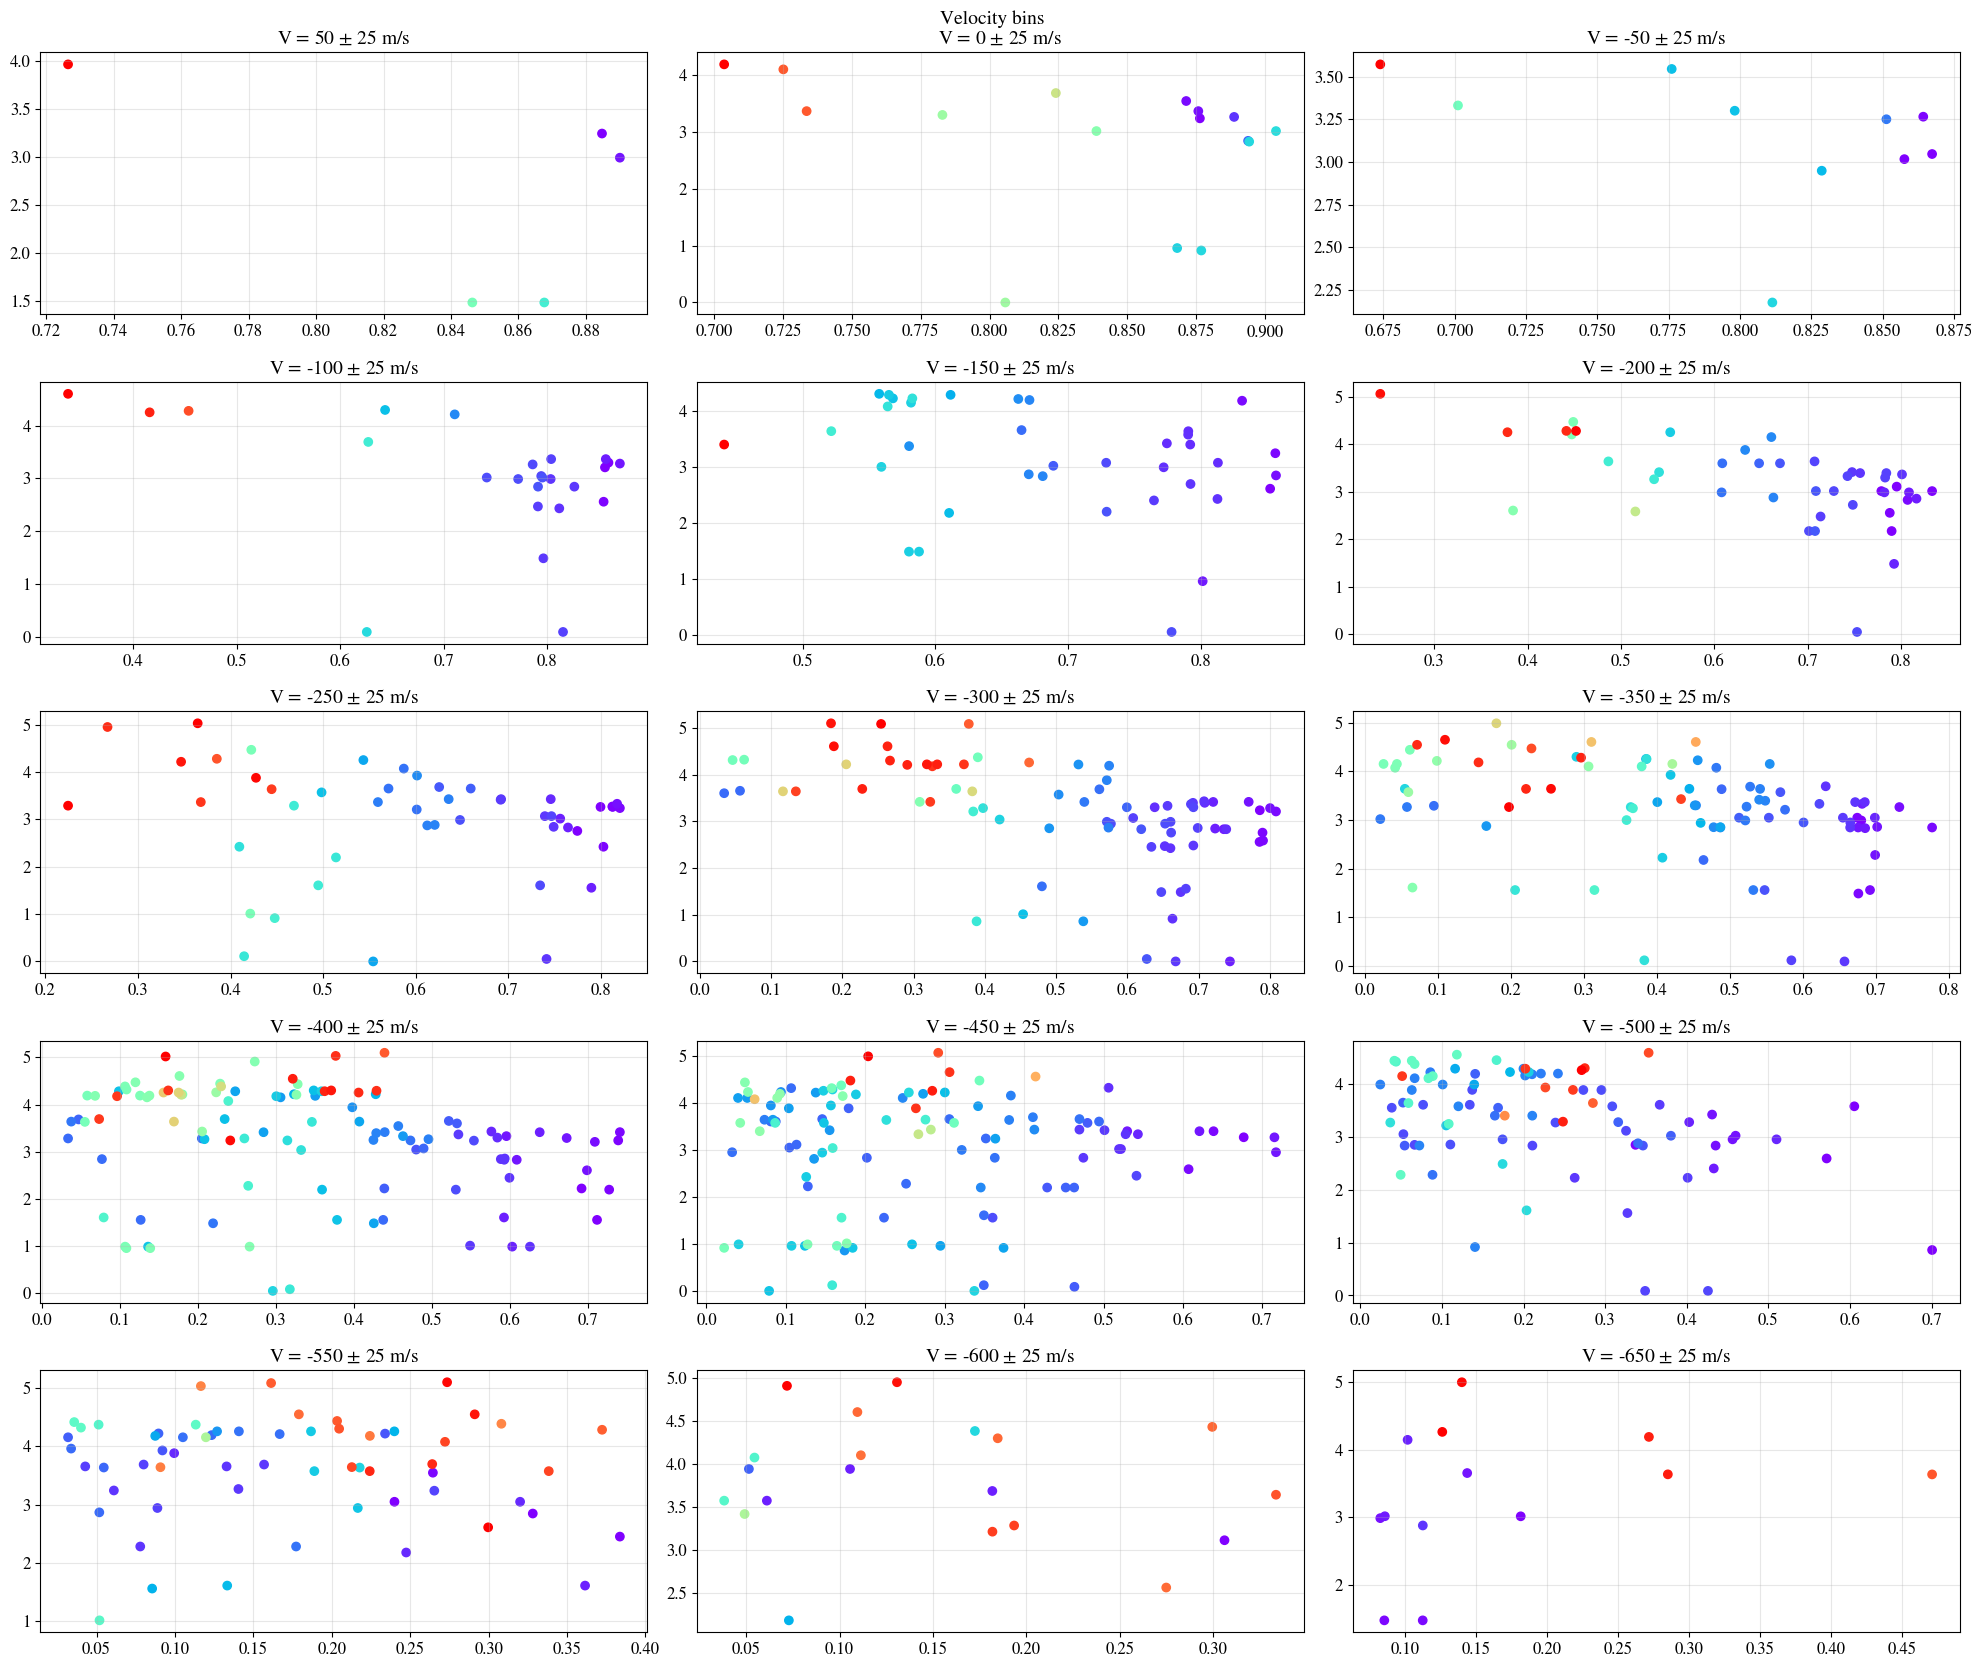

In [40]:
#Organize the dataframe wtih ascending velocities
listed = ALL_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_ALL = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_ALL.append(Energy_data_ALL[Energy_data_ALL['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_ALL[i]['Line Depth'],velocity_ALL[i]['Lower potential'],c=velocity_ALL[i]["Wave A"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

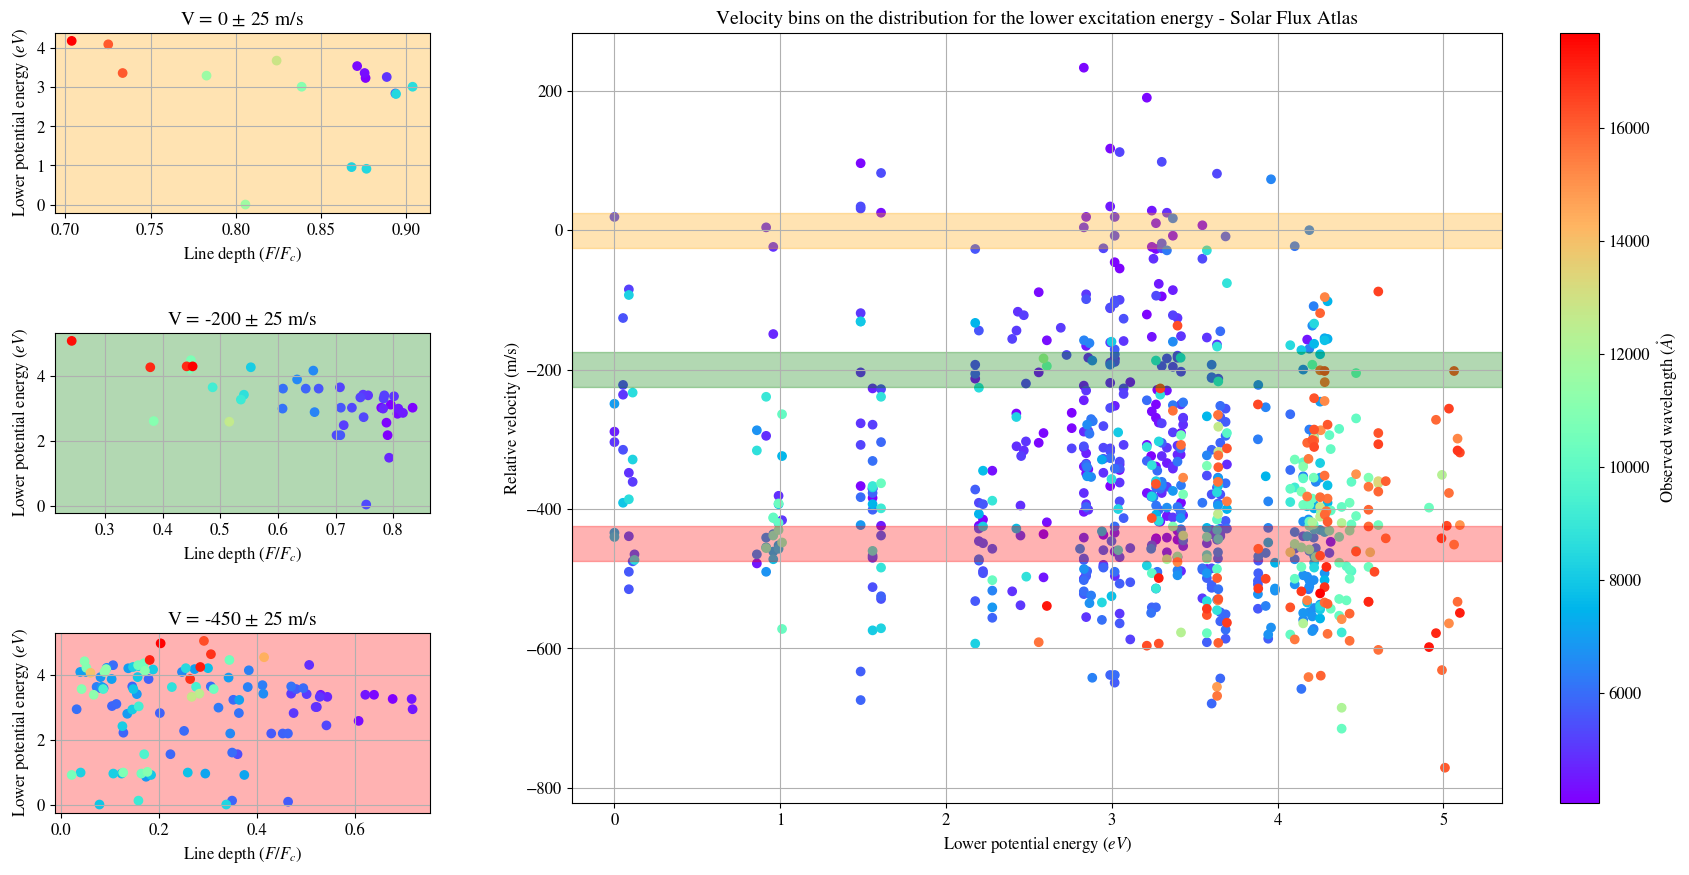

In [ ]:
#Another form to graph
# Crear figura principal
fig3, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(Energy_data_ALL['Lower potential'],Energy_data_ALL['Velocity'],c=Energy_data_ALL['Wave A'],cmap='rainbow',lw=1)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Velocity bins on the distribution for the lower excitation energy - Solar Flux Atlas')
ax.set_xlabel(r'Lower potential energy $(eV)$')
ax.set_ylabel(r'Relative velocity (m/s)')
ax.grid()

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig3.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig3.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig3.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graficar el zoom en la región de interés
i=1
ax_inseti.scatter(velocity_ALL[i]['Line Depth'],velocity_ALL[i]['Lower potential'],c=velocity_ALL[i]["Wave A"],cmap='rainbow')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.set_ylabel(r'Lower potential energy $(eV)$')
ax_inseti.set_xlabel(r'Line depth $(F/F_{c})$')
ax_inseti.grid()

j=5
ax_insetj.scatter(velocity_ALL[j]['Line Depth'],velocity_ALL[j]['Lower potential'],c=velocity_ALL[j]["Wave A"],cmap='rainbow')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_ylabel(r'Lower potential energy $(eV)$')
ax_insetj.set_xlabel(r'Line depth $(F/F_{c})$')
ax_insetj.grid()

k=10
ax_insetk.scatter(velocity_ALL[k]['Line Depth'],velocity_ALL[k]['Lower potential'],c=velocity_ALL[k]["Wave A"],cmap='rainbow')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_ylabel(r'Lower potential energy $(eV)$')
ax_insetk.set_xlabel(r'Line depth $(F/F_{c})$')
ax_insetk.grid()


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

ax_inseti.set_facecolor(color=('orange', 0.3))
ax_insetj.set_facecolor(color=('green', 0.3))
ax_insetk.set_facecolor(color=('red', 0.3))

plt.show()

# fig.savefig('Velocity bins energy plot_ALL', bbox_inches='tight')

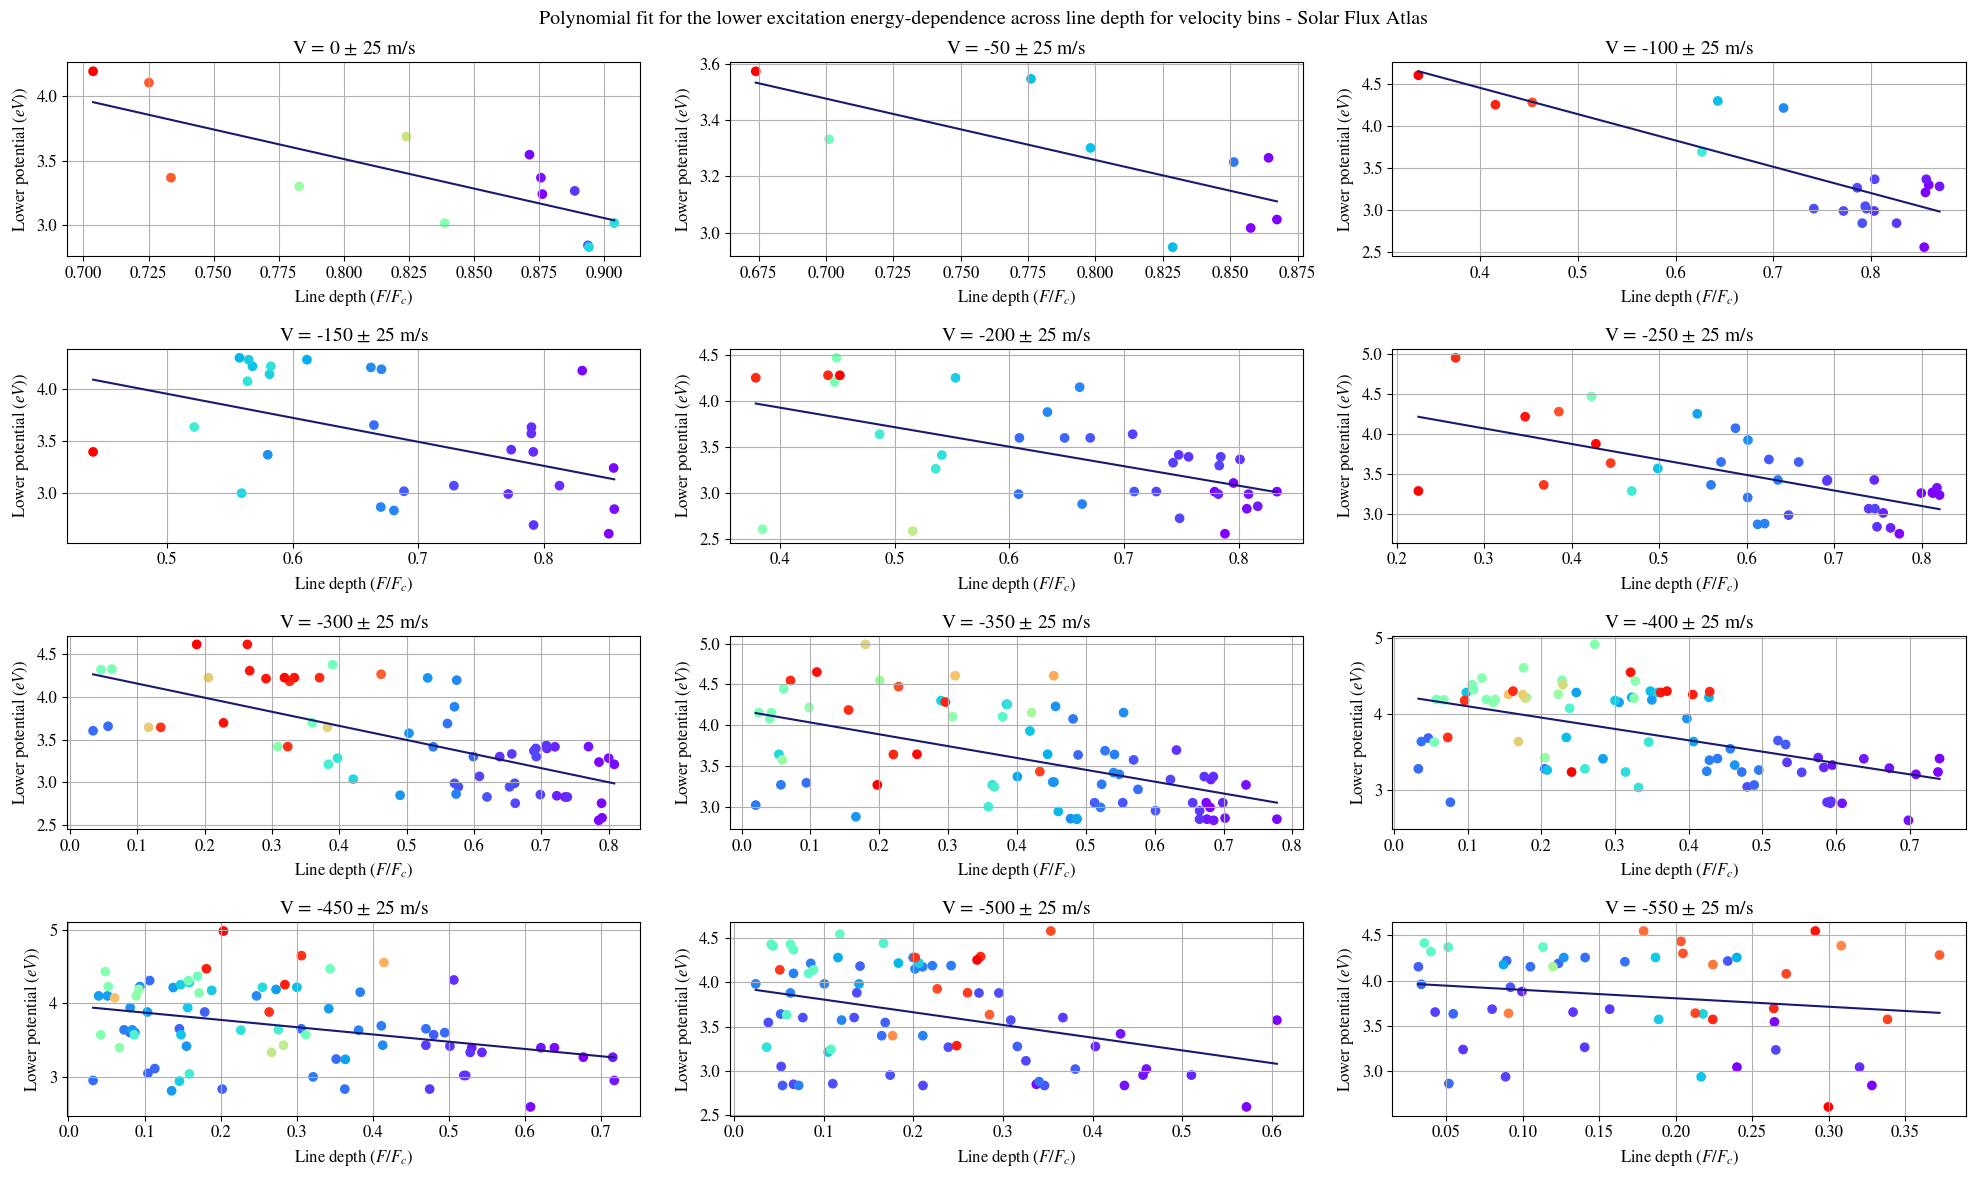

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_ALL = []
values_param_ALL = []
wave_ALL = []
cov_ALL = []

for i in range(1,13):
    #Reduce the scattered points to observe the values of slopes
    new_data =velocity_ALL[i][velocity_ALL[i]['Lower potential'].between(2.5,5,inclusive='right')]

    #polynomial fit
    _,cov = np.polyfit(new_data['Line Depth'],new_data['Lower potential'], 1,cov=True)
    pol = Polynomial.fit(new_data['Line Depth'],new_data['Lower potential'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Line Depth']), max(new_data['Line Depth']), len(new_data['Line Depth']))
    flux_fit = poly.polyval(values_flux,param)

    cov_ALL.append(np.sqrt(np.diag(cov)))
    fits_ALL.append([values_flux,flux_fit])
    values_param_ALL.append(pd.DataFrame(param))
    wave_ALL.append(new_data)

values_param_ALL = pd.concat(values_param_ALL,axis=1).T.reset_index(drop=True)
values_param_ALL.columns = ['Shift','Slope']
values_param_ALL = values_param_ALL.set_axis(markers[1:13], axis=0)

#Take just the values that we want
velocity_ALL_new = velocity_ALL[1:13]
markers_new = markers[1:13]

fig5, axes = plt.subplots(4, 3, figsize=(20, 12))
fig5.suptitle('Polynomial fit for the lower excitation energy-dependence across line depth for velocity bins - Solar Flux Atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_ALL):
        
        ax.scatter(wave_ALL[i]['Line Depth'],wave_ALL[i]['Lower potential'],c=wave_ALL[i]["Wave A"],cmap='rainbow')
        ax.plot(fits_ALL[i][0],fits_ALL[i][1],color='midnightblue')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Line depth $(F/F_{c})$')
        ax.set_ylabel(r'Lower potential $(eV))$')
        ax.grid()

plt.tight_layout()
plt.show()

# fig5.savefig('Velocity bins energy ALL')

In [43]:
cov_slope = [each[0] for each in cov_ALL]
cov_shift = [each[1] for each in cov_ALL]
values_param_ALL['Error slope'] = cov_slope
values_param_ALL['Error shift'] = cov_shift
values_param_ALL

,Shift,Slope,Error slope,Error shift
0,7.163611,-4.563852,1.156457,0.965155
-50,5.000523,-2.178140,0.806995,0.649571
-100,5.711478,-3.135595,0.495852,0.369704
-150,5.109898,-2.310238,0.820835,0.568826
-200,4.778271,-2.120386,0.559491,0.374793
-250,4.653389,-1.936183,0.412101,0.258801
-300,4.314683,-1.639993,0.240862,0.131467
-350,4.177869,-1.453437,0.269426,0.125133
-400,4.251000,-1.486354,0.268332,0.103041
-450,3.973436,-0.991603,0.297361,0.098262


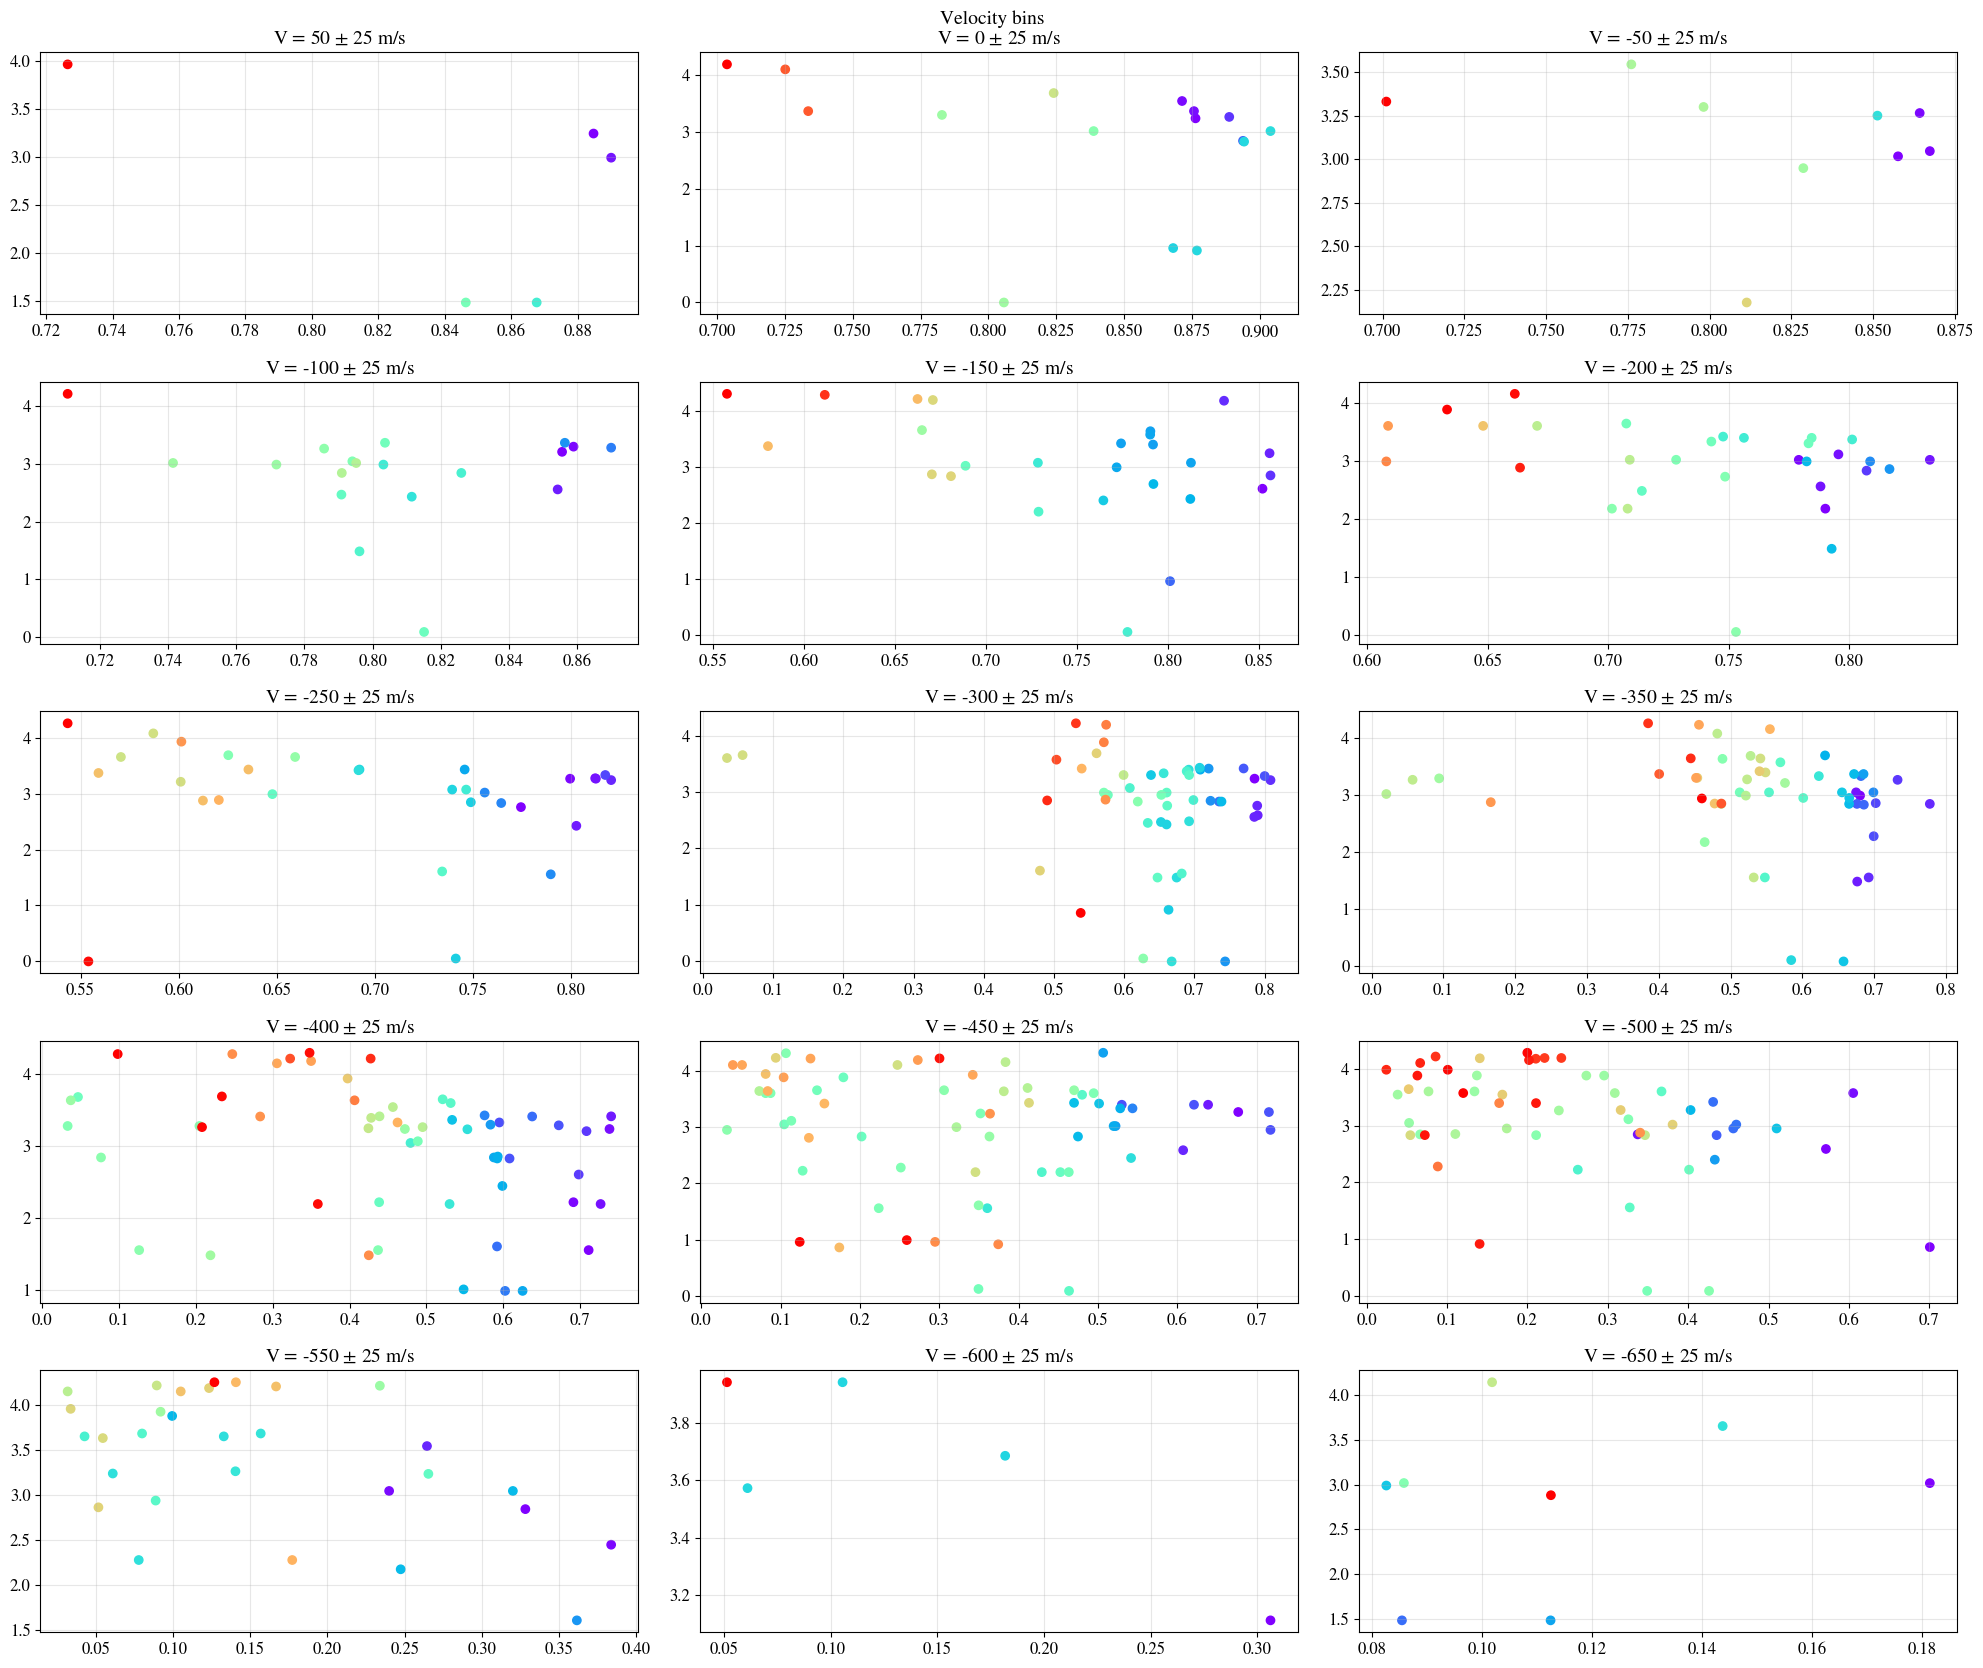

In [44]:
#Organize the dataframe wtih ascending velocities
listed = SPA_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_SPA = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_SPA.append(Energy_data_SPA[Energy_data_SPA['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_SPA[i]['Line Depth'],velocity_SPA[i]['Lower potential'],c=velocity_SPA[i]["Wave A"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

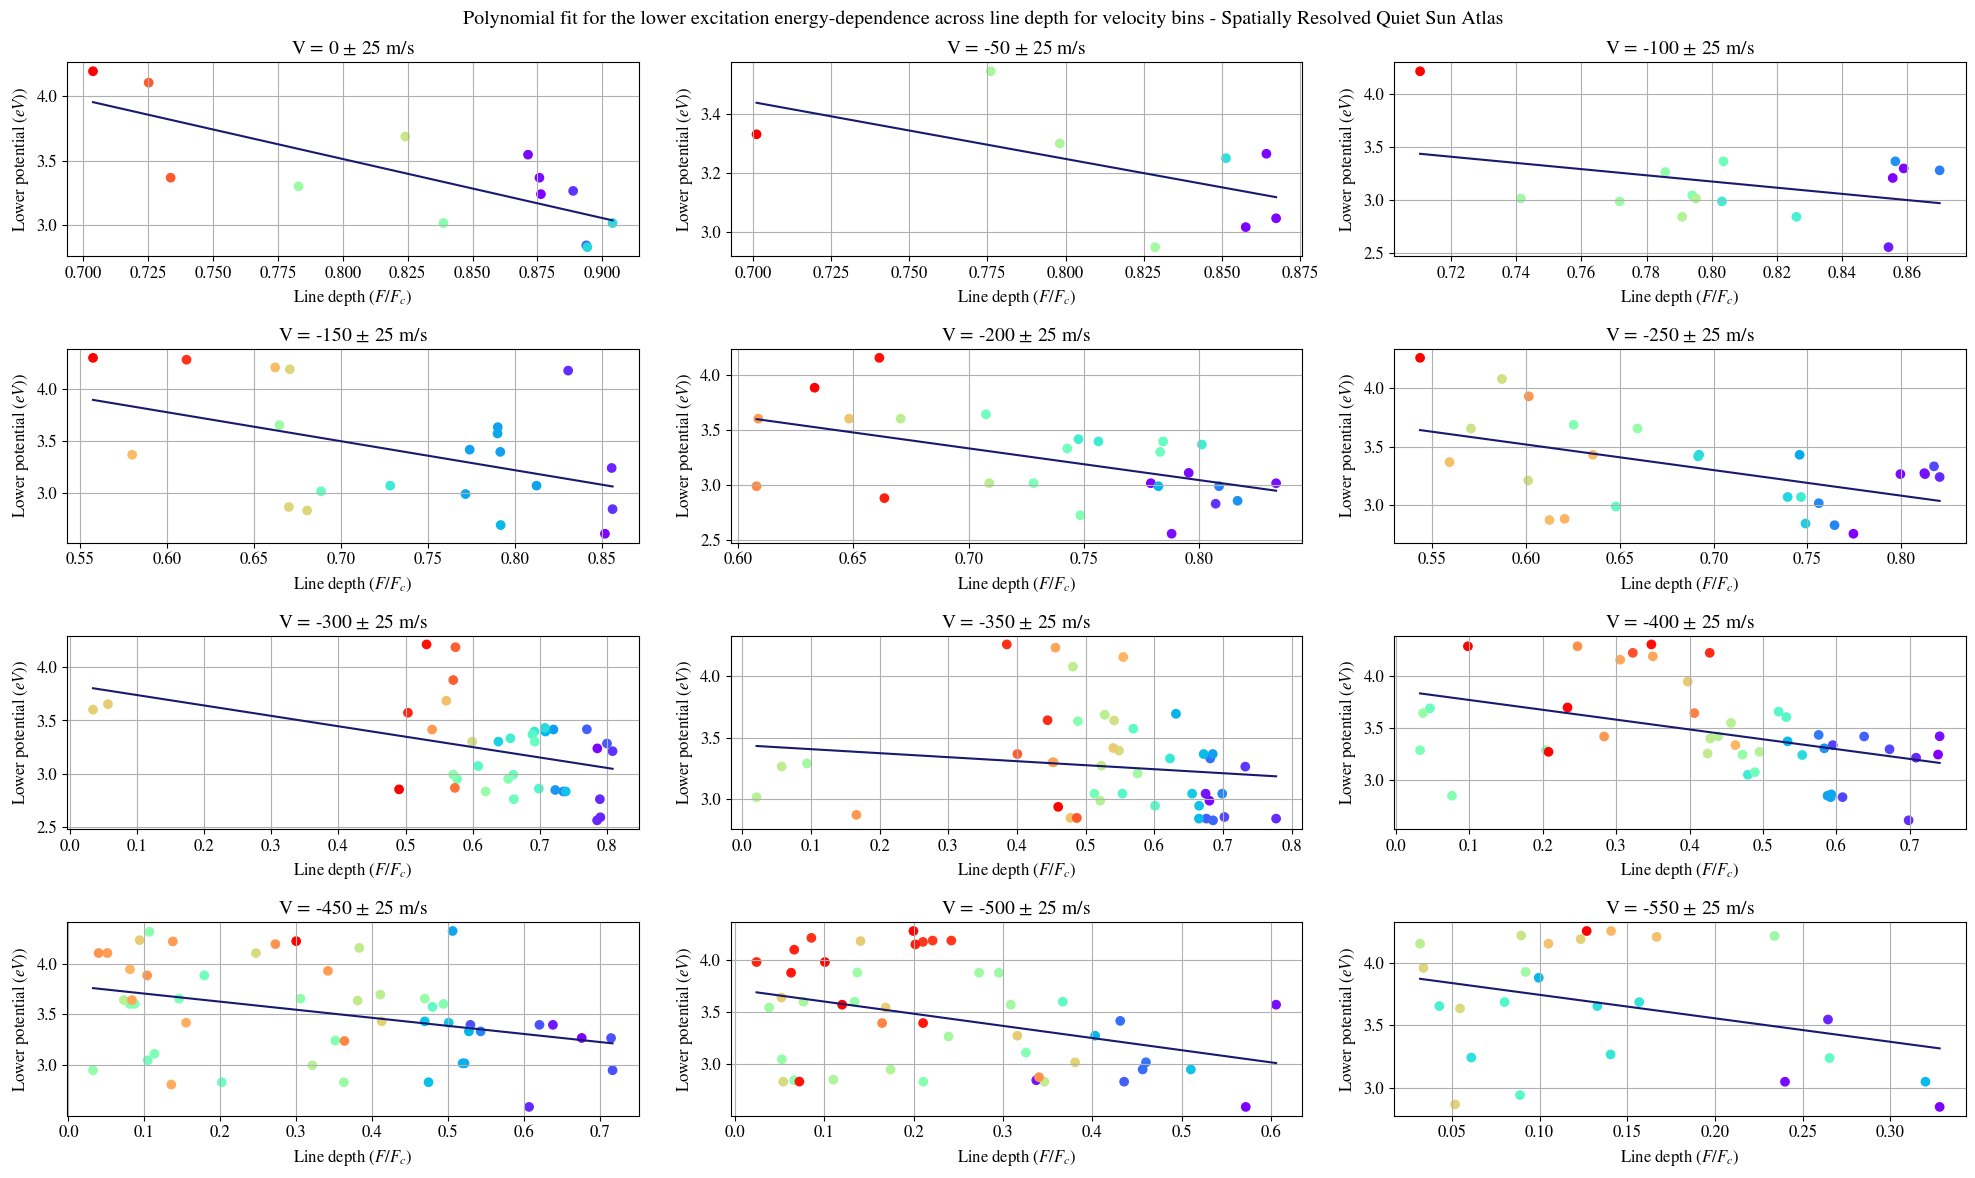

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []
cov_SPA = []

for i in range(1,13):
    #Reduce the scattered points to observe the values of slopes
    new_data =velocity_SPA[i][velocity_SPA[i]['Lower potential'].between(2.5,5,inclusive='right')]

    #polynomial fit
    _,cov = np.polyfit(new_data['Line Depth'],new_data['Lower potential'], 1,cov=True)
    pol = Polynomial.fit(new_data['Line Depth'],new_data['Lower potential'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Line Depth']), max(new_data['Line Depth']), len(new_data['Line Depth']))
    flux_fit = poly.polyval(values_flux,param)

    cov_SPA.append(np.sqrt(np.diag(cov)))
    fits_SPA.append([values_flux,flux_fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

values_param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
values_param_SPA.columns = ['Shift','Slope']
values_param_SPA = values_param_SPA.set_axis(markers[1:13], axis=0)

#Take just the values that we want
velocity_SPA_new = velocity_SPA[1:13]
markers_new = markers[1:13]

fig5, axes = plt.subplots(4, 3, figsize=(20, 12))
fig5.suptitle('Polynomial fit for the lower excitation energy-dependence across line depth for velocity bins - Spatially Resolved Quiet Sun Atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_ALL):
        
        ax.scatter(wave_SPA[i]['Line Depth'],wave_SPA[i]['Lower potential'],c=wave_SPA[i]["Wave A"],cmap='rainbow')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='midnightblue')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Line depth $(F/F_{c})$')
        ax.set_ylabel(r'Lower potential $(eV))$')
        ax.grid()

plt.tight_layout()
plt.show()

# fig5.savefig('Velocity bins energy SPA')

In [46]:
cov_slope = [each[0] for each in cov_SPA]
cov_shift = [each[1] for each in cov_SPA]
values_param_SPA['Error slope'] = cov_slope
values_param_SPA['Error shift'] = cov_shift
values_param_SPA

,Shift,Slope,Error slope,Error shift
0,7.163611,-4.563852,1.156457,0.965155
-50,4.790377,-1.927417,1.158362,0.949665
-100,5.509900,-2.914949,2.069569,1.674453
-150,5.452580,-2.790717,1.242150,0.919573
-200,5.347180,-2.877157,0.984015,0.727776
-250,4.823842,-2.177114,0.751622,0.524194
-300,3.837424,-0.980200,0.371435,0.241979
-350,3.439920,-0.324684,0.347360,0.193180
-400,3.860710,-0.945535,0.318433,0.151196
-450,3.783218,-0.794277,0.303247,0.117437
